In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_base = pd.read_csv('../data/processed/data_processed_1990_2023.csv', index_col='fecha')
df_base.drop('target', axis=1, inplace=True)
df_base.index = pd.to_datetime(df_base.index)
df_base.tail(7)

,tmin,tmax,tmed,presMin,presMax,dir,velmedia,racha,sol,prec
fecha,,,,,,,,,,
2023-03-02,0.5,16.9,8.7,1014.4,1017.7,30.0,1.1,5.8,11.0,0.0
2023-03-03,0.1,18.5,9.3,1013.9,1018.1,5.0,1.4,5.8,10.8,0.0
2023-03-04,6.8,17.9,12.4,1014.5,1017.6,99.0,1.9,5.0,5.2,0.0
2023-03-05,6.0,15.5,10.8,1011.0,1015.3,99.0,0.6,5.0,0.0,1.5
2023-03-06,10.3,15.9,13.1,1008.7,1013.4,21.0,1.9,8.3,0.0,3.3
2023-03-07,12.9,19.7,16.3,1009.8,1013.4,22.0,3.9,10.3,3.2,0.6
2023-03-08,14.4,20.5,17.4,1011.6,1015.1,22.0,6.1,10.3,3.2,2.5


In [3]:
df_last_500 = df_base.iloc[-500:]
df_last_500.head()

,tmin,tmax,tmed,presMin,presMax,dir,velmedia,racha,sol,prec
fecha,,,,,,,,,,
2021-10-25,11.2,26.6,18.9,1013.7,1018.0,99.0,1.9,6.1,8.9,0.0
2021-10-26,12.6,26.6,19.6,1014.2,1017.2,8.0,2.8,9.2,8.2,0.0
2021-10-27,12.5,26.3,19.4,1013.8,1017.7,6.0,4.2,10.8,10.2,0.0
2021-10-28,12.5,25.9,19.2,1010.8,1015.1,21.0,2.2,7.8,9.8,0.0
2021-10-29,16.4,23.6,20.0,1009.2,1013.1,22.0,7.2,15.3,1.1,1.5


Voy a ir haciendo las pruebas con el last 500 para que no pese mucho

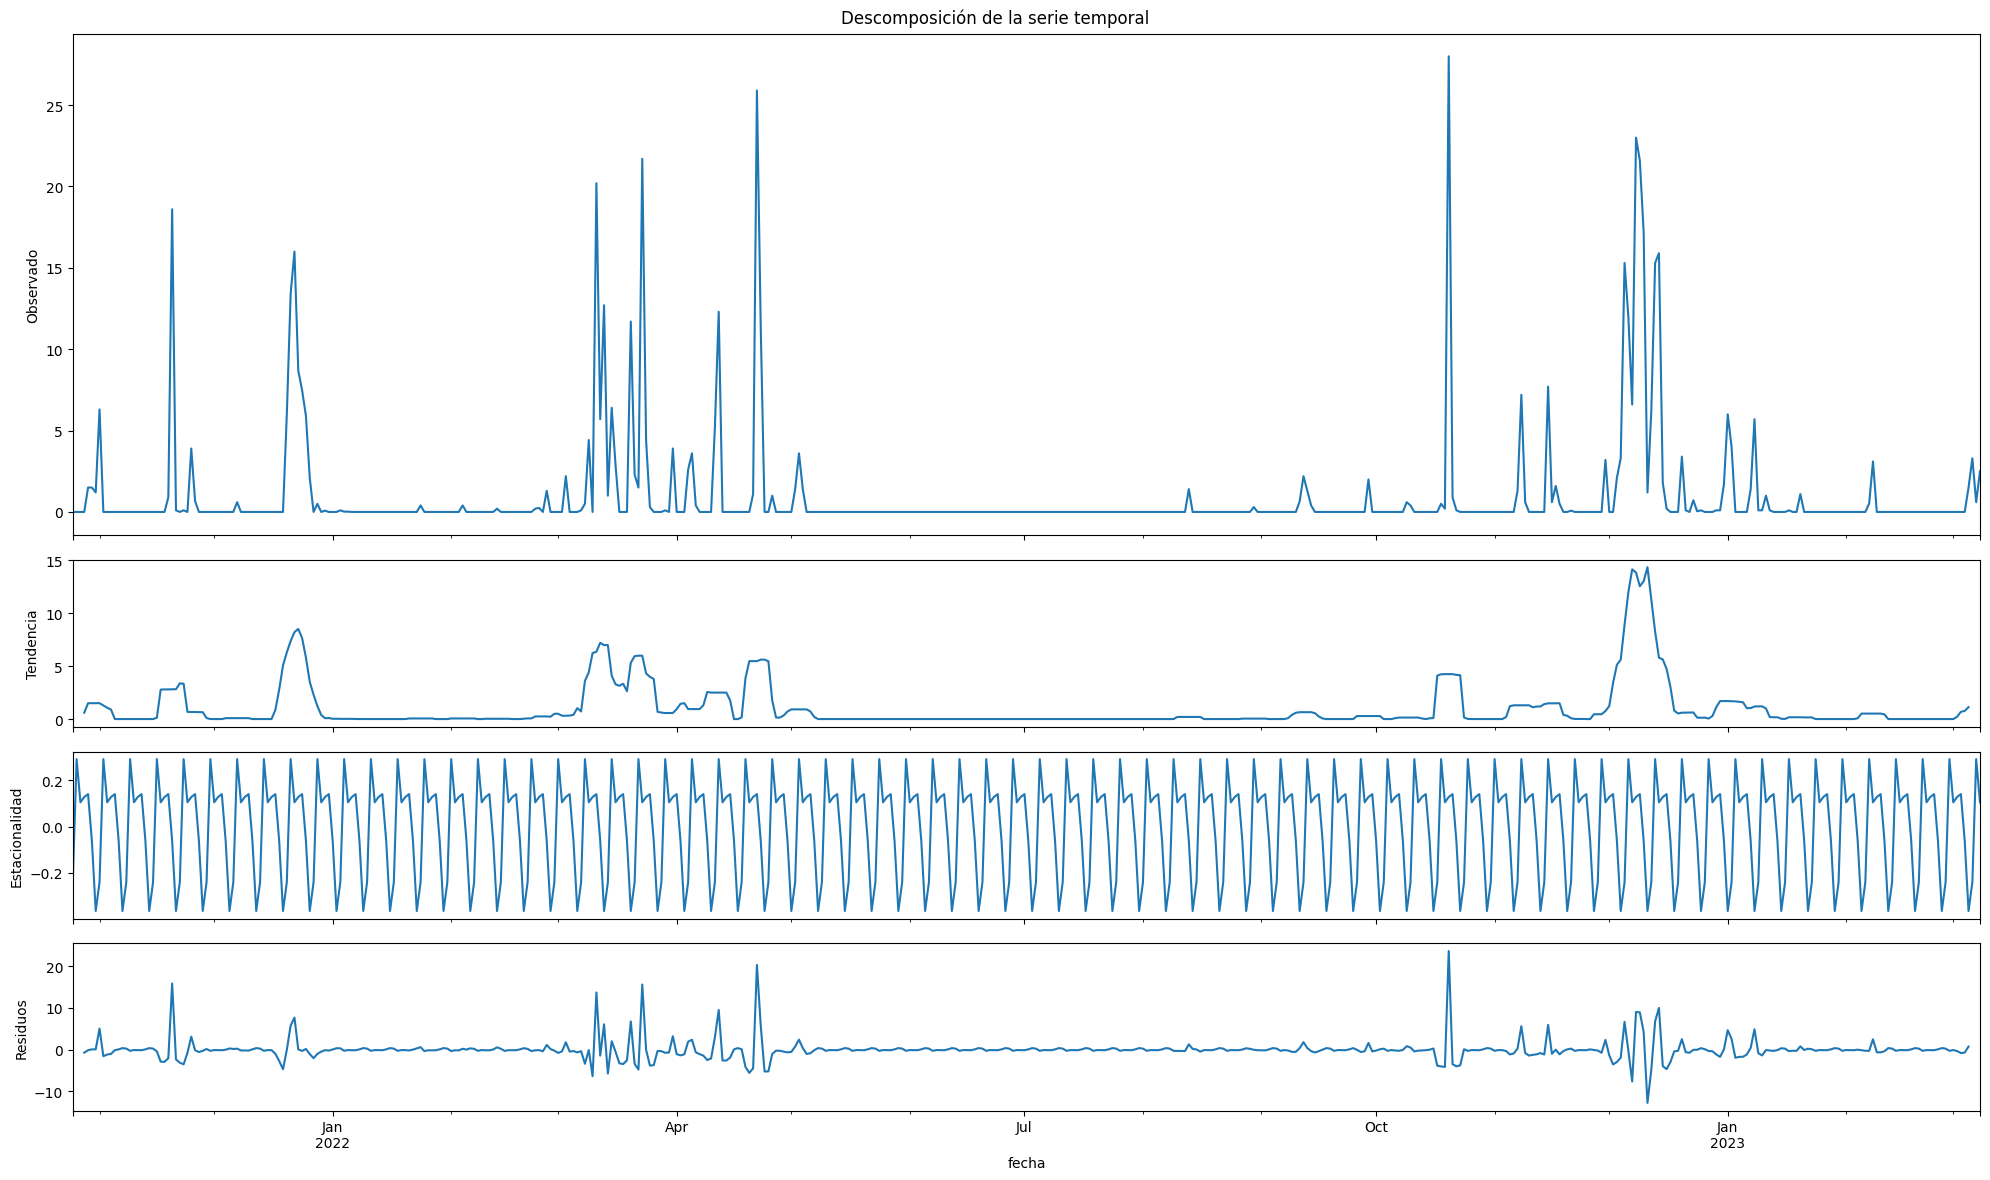

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_data = seasonal_decompose(df_last_500['prec'], model="additive")

# Reescalar el plot
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(20, 12), sharex=True, gridspec_kw={'height_ratios': [3, 1, 1, 1]})

# Graficar cada una de las subplots
decompose_data.observed.plot(ax=axes[0], legend=False)
axes[0].set_ylabel('Observado')

decompose_data.trend.plot(ax=axes[1], legend=False)
axes[1].set_ylabel('Tendencia')

decompose_data.seasonal.plot(ax=axes[2], legend=False)
axes[2].set_ylabel('Estacionalidad')

decompose_data.resid.plot(ax=axes[3], legend=False)
axes[3].set_ylabel('Residuos')

# Agregar título a la figura
fig.suptitle('Descomposición de la serie temporal')

# Ajustar el espaciado entre las subplots
fig.tight_layout()

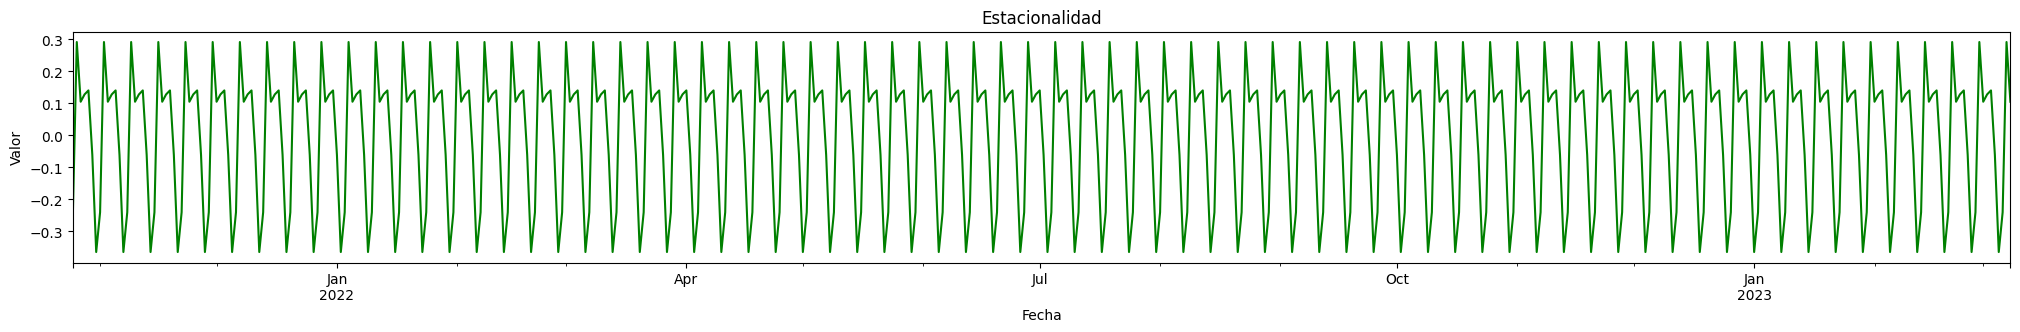

In [5]:
seasonality=decompose_data.seasonal
# Reescalar el plot
fig, ax = plt.subplots(figsize=(25, 3))

# Graficar la serie temporal
seasonality.plot(ax=ax, color='green')

# Agregar título y etiquetas a los ejes
ax.set_title('Estacionalidad')
ax.set_xlabel('Fecha')
ax.set_ylabel('Valor')

# Mostrar el plot
plt.show()

ADFULLER

In [6]:
from statsmodels.tsa.stattools import adfuller
df_adf = adfuller(df_last_500['prec'], autolag = 'AIC')
print("1. ADF : ",df_adf[0])
print("2. P-Value : ", df_adf[1])
print("3. Num Of Lags : ", df_adf[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", df_adf[3])
print("5. Critical Values :")
for key, val in df_adf[4].items():
    print("\t",key, ": ", val)
print(f"Resultado: La serie es {'no' if df_adf[1] > 0.05 else ''}estacionaria")

1. ADF :  -7.359224160783927
2. P-Value :  9.598287135948535e-11
3. Num Of Lags :  3
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 496
5. Critical Values :
	 1% :  -3.4436029548776395
	 5% :  -2.867384756137026
	 10% :  -2.5698830308597813
Resultado: La serie es estacionaria


KPSS

In [7]:
from statsmodels.tsa.stattools import kpss

df_kpss = kpss(df_last_500['prec'])
print("1. KPSS : ",df_kpss[0])
print("2. P-Value : ", df_kpss[1])
print("3. Num Of Lags : ", df_kpss[2])
print("4. Critical Values :")
for key, val in df_kpss[3].items():
    print("\t",key, ": ", val)
print(f"Resultado: La serie es {'no' if df_kpss[1] < 0.05 else ''}estacionaria")

1. KPSS :  0.0888677938942883
2. P-Value :  0.1
3. Num Of Lags :  10
4. Critical Values :
	 10% :  0.347
	 5% :  0.463
	 2.5% :  0.574
	 1% :  0.739
Resultado: La serie es estacionaria


C:\Users\jdelacu1\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

AUTOCORRELATION PLOT

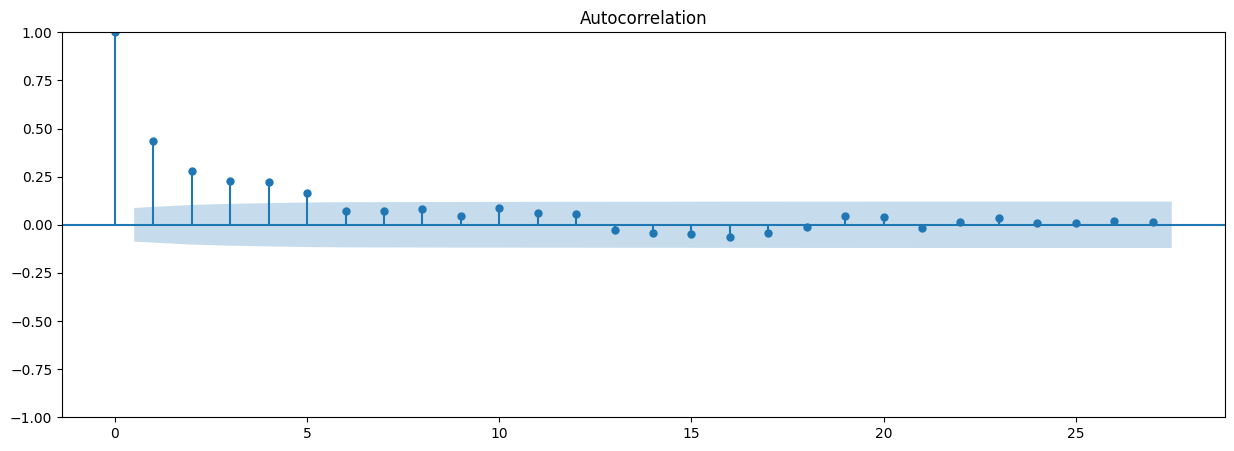

In [24]:
fig, ax = plt.subplots(figsize=(15, 5))
plot_acf(df_last_500['prec'], ax=ax)
plt.show()

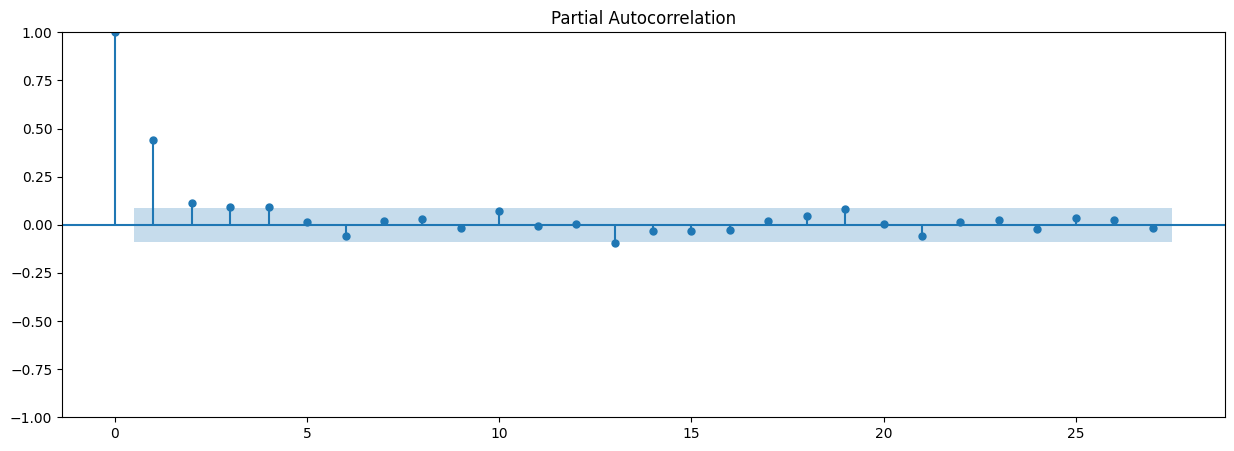

In [25]:
fig, ax = plt.subplots(figsize=(15, 5))
plot_pacf(df_last_500['prec'], ax=ax)
plt.show()

Como en en el ACF vemos el corte en el retraso 5, su valor de `q` será = 4, mientras que en el PACF vemos que el corte está en el retraso 5, con lo que su valor de `p` será = 4.

SEASONAL (ACF)

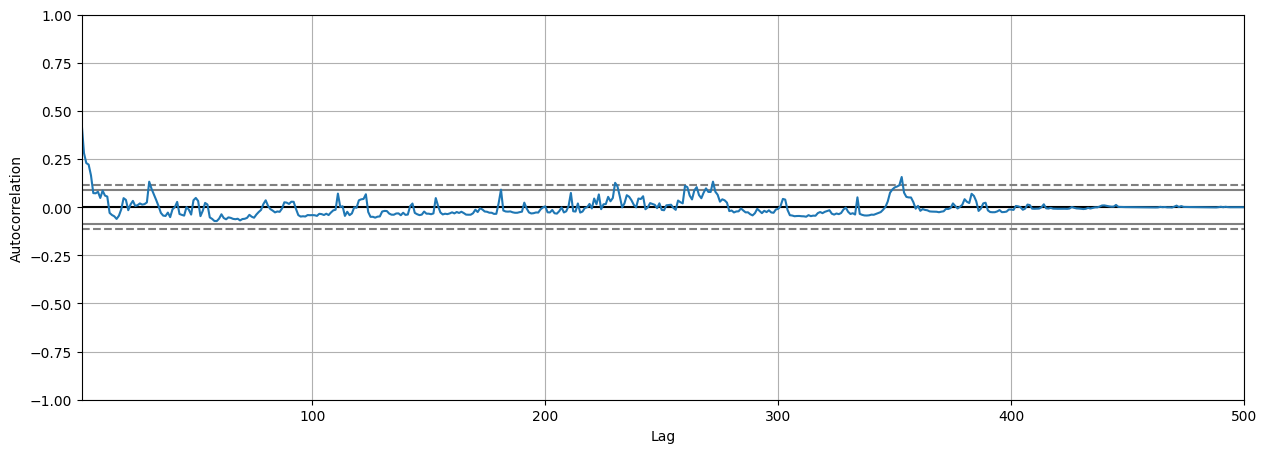

In [26]:
fig, ax = plt.subplots(figsize=(15, 5))

x = pd.plotting.autocorrelation_plot(df_last_500['prec'])
 
# plotting the Curve
x.plot()
 
# Display
plt.show()

AR

In [28]:
from statsmodels.tsa.ar_model import AutoReg

model = AutoReg(df_last_500['prec'], lags=4)
resultados = model.fit()
resultados.summary()

C:\Users\jdelacu1\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                   prec   No. Observations:                  500
Model:                     AutoReg(4)   Log Likelihood               -1269.812
Method:               Conditional MLE   S.D. of innovations              3.130
Date:                Wed, 15 Mar 2023   AIC                           2551.624
Time:                        14:24:23   BIC                           2576.864
Sample:                    10-29-2021   HQIC                          2561.532
                         - 03-08-2023                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4299      0.152      2.835      0.005       0.133       0.727
prec.L1        0.3699      0.045      8.274      0.000       0.282       0.458
prec.L2        0.0692      0.048      1.452      0.146      -0.024       0.163
prec.L3        0.0542      0.048      1.137      0.256      -0.039       0.148
prec.L4        0.0937      0.045      2.095      0.036       0.006       0.181
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3092           -0.0000j            1.3092           -0.0000
AR.2            0.1332           -1.9405j            1.9450           -0.2391
AR.3            0.1332           +1.9405j            1.9450            0.2391
AR.4           -2.1538           -0.0000j            2.1538           -0.5000
-----------------------------------------------------------------------------
"""

In [29]:
predicciones = resultados.predict(start=len(df_last_500['prec']), end=len(df_last_500['prec'])+7)

C:\Users\jdelacu1\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


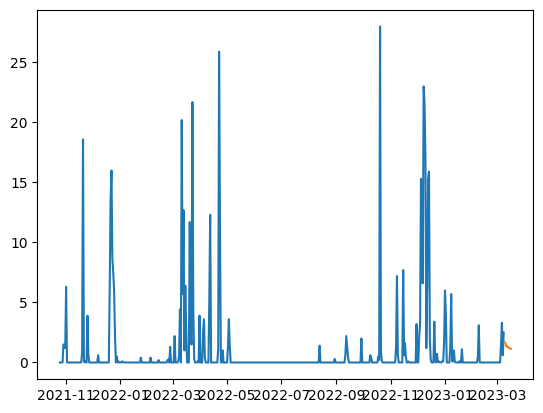

In [30]:
plt.plot(df_last_500['prec'])
plt.plot(predicciones)
plt.show()

ARIMA

In [35]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df_last_500['prec'], order=(4,0,4))
resultados = model.fit()
resultados.summary()

C:\Users\jdelacu1\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\jdelacu1\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\jdelacu1\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\jdelacu1\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   prec   No. Observations:                  500
Model:                 ARIMA(4, 0, 4)   Log Likelihood               -1276.636
Date:                Wed, 15 Mar 2023   AIC                           2573.272
Time:                        15:09:02   BIC                           2615.418
Sample:                    10-25-2021   HQIC                          2589.810
                         - 03-08-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0188      0.978      1.042      0.297      -0.898       2.935
ar.L1          1.1989      1.831      0.655      0.513      -2.391       4.788
ar.L2         -1.1577      1.072     -1.080      0.280      -3.259       0.943
ar.L3          1.2055      1.475      0.817      0.414      -1.686       4.097
ar.L4         -0.4244      1.314     -0.323      0.747      -3.000       2.151
ma.L1         -0.8313      1.823     -0.456      0.648      -4.404       2.741
ma.L2          0.9387      0.416      2.254      0.024       0.122       1.755
ma.L3         -0.8789      1.504     -0.585      0.559      -3.826       2.068
ma.L4          0.2071      0.725      0.286      0.775      -1.214       1.629
sigma2         9.6577      0.364     26.519      0.000       8.944      10.371
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             21994.57
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               1.16   Skew:                             4.69
Prob(H) (two-sided):                  0.35   Kurtosis:                        34.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

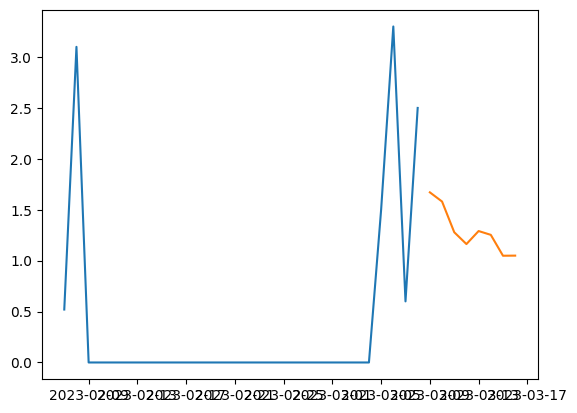

In [38]:
predicciones = resultados.predict(start=len(df_last_500['prec']), end=len(df_last_500['prec'])+7)
plt.plot(df_last_500['prec'][-30:])
plt.plot(predicciones)
plt.show()

------

AUTO ARIMA 

https://towardsdatascience.com/time-series-forecasting-using-auto-arima-in-python-bb83e49210cd

ES ESTACIONARIO, NO HAY QUE DIFERENCIAR

In [8]:
df_base = pd.read_csv('../data/processed/data_processed_1990_2023.csv', index_col='fecha')
df_base.drop('target', axis=1, inplace=True)
df_base.index = pd.to_datetime(df_base.index)
df_last_500 = df_base.iloc[-500:]

In [10]:
train = df_last_500['prec'][:-50]
test = df_last_500['prec'][-50:]

In [46]:
from pmdarima.arima import auto_arima

arima_model = auto_arima(df_base['prec'])
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                12120
Model:               SARIMAX(1, 0, 5)   Log Likelihood              -36388.516
Date:                Wed, 15 Mar 2023   AIC                          72793.033
Time:                        15:23:22   BIC                          72852.253
Sample:                    01-01-1990   HQIC                         72812.888
                         - 03-08-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0504      0.013      3.784      0.000       0.024       0.077
ar.L1          0.9645      0.007    142.508      0.000       0.951       0.978
ma.L1         -0.6875      0.008    -88.887      0.000      -0.703      -0.672
ma.L2         -0.1388      0.007    -19.879      0.000      -0.153      -0.125
ma.L3          0.0017      0.007      0.235      0.814      -0.012       0.015
ma.L4         -0.0551      0.008     -6.925      0.000      -0.071      -0.039
ma.L5         -0.0208      0.007     -2.835      0.005      -0.035      -0.006
sigma2        23.7314      0.077    306.881      0.000      23.580      23.883
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           3076280.54
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.74   Skew:                             6.63
Prob(H) (two-sided):                  0.00   Kurtosis:                        79.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [56]:
arima_model = auto_arima(df_last_500['prec'], seasonal=True, m=7)
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  500
Model:               SARIMAX(1, 0, 2)   Log Likelihood               -1279.209
Date:                Wed, 15 Mar 2023   AIC                           2568.418
Time:                        16:23:27   BIC                           2589.492
Sample:                    10-25-2021   HQIC                          2576.687
                         - 03-08-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1971      0.192      1.024      0.306      -0.180       0.574
ar.L1          0.8072      0.049     16.506      0.000       0.711       0.903
ma.L1         -0.4372      0.057     -7.650      0.000      -0.549      -0.325
ma.L2         -0.0865      0.037     -2.324      0.020      -0.159      -0.014
sigma2         9.7611      0.349     27.993      0.000       9.078      10.444
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             21747.77
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.15   Skew:                             4.68
Prob(H) (two-sided):                  0.38   Kurtosis:                        33.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

---
SARIMAX